In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도
import pandas as pd
import numpy as np
from sklearn.metrics import *
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='NanumBarunGothic')
# 여기까지하고 런타임 다시 시작!!——> 이 셀부터 설치빼고 다시 실행

In [100]:
disney=pd.read_csv("/content/DIS.csv")
disney

#https://finance.yahoo.com/quote/DIS/history?period1=1420070400&period2=1650412800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,94.910004,95.279999,92.849998,93.750000,87.376266,5865400
1,2015-01-05,93.279999,93.349998,91.779999,92.379997,86.099403,7789400
2,2015-01-06,92.570000,93.190002,91.160004,91.889999,85.642723,6793100
3,2015-01-07,92.720001,93.150002,92.099998,92.830002,86.518799,6589500
4,2015-01-08,93.870003,94.300003,93.559998,93.790001,87.413528,7579400
...,...,...,...,...,...,...,...
1832,2022-04-12,131.809998,133.210007,130.149994,130.839996,130.839996,7885600
1833,2022-04-13,131.050003,132.889999,130.750000,132.350006,132.350006,7694500
1834,2022-04-14,132.809998,133.589996,130.350006,130.470001,130.470001,7252200
1835,2022-04-18,130.070007,130.220001,126.820000,127.769997,127.769997,10571000


ARIMA

In [134]:
a_dis=disney[["Date","Adj Close"]]
a_dis.columns=['day', 'price']
a_dis['day']=pd.to_datetime(a_dis['day'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [135]:
a_dis.set_index('day', inplace=True)
a_dis

,price
day,
2015-01-02,87.376266
2015-01-05,86.099403
2015-01-06,85.642723
2015-01-07,86.518799
2015-01-08,87.413528
...,...
2022-04-12,130.839996
2022-04-13,132.350006
2022-04-14,130.470001


In [136]:
a_train=a_dis[:1832]
a_test=a_dis[1832:]

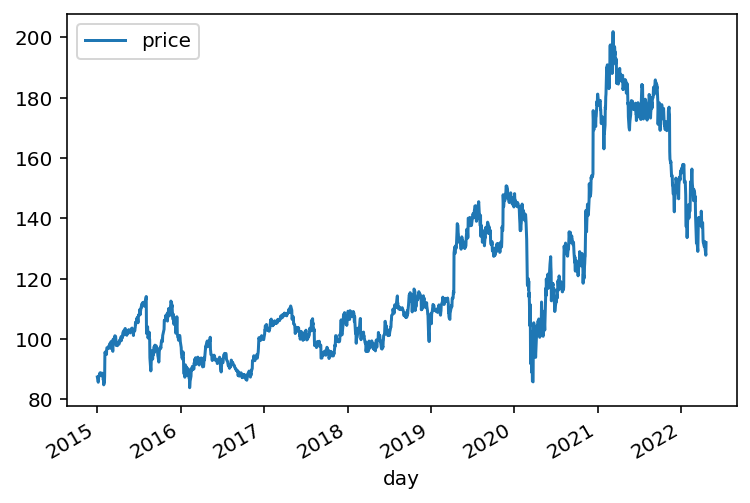

In [137]:
a_dis.plot()

In [138]:
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.api as sm

In [139]:
model = ARIMA(a_train.price.values, order = (2,1,2))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1831
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3940.811
Method:                       css-mle   S.D. of innovations              2.082
Date:                Wed, 20 Apr 2022   AIC                           7893.622
Time:                        04:22:25   BIC                           7926.698
Sample:                             1   HQIC                          7905.821
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0236      0.047      0.501      0.616      -0.069       0.116
ar.L1.D.y     -1.6854      0.064    -26.296      0.000      -1.811      -1.560
ar.L2.D.y     -0.8432      0.059    -14.410      0.0

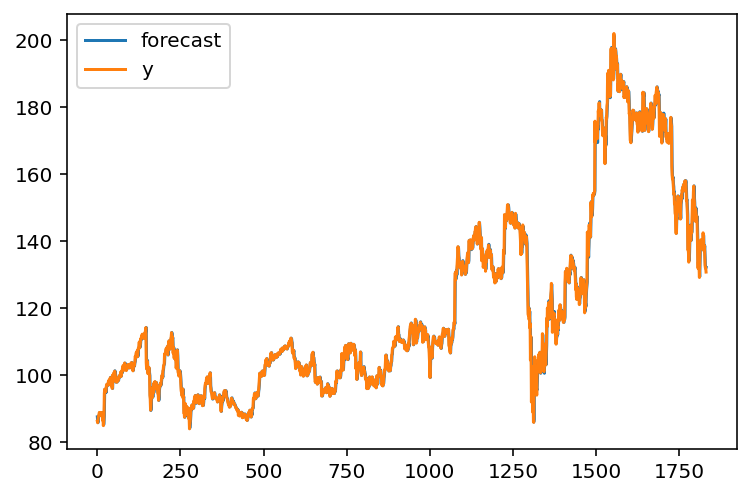

In [140]:
fig= model_fit.plot_predict()

In [141]:
forecast_data = model_fit.forecast(steps=5) 
forecast_data[0]

array([130.56684331, 130.69677858, 130.63124516, 130.71548777,
       130.71211014])

In [142]:
pred_y = forecast_data[0].tolist()
pred_y

[130.56684331452115,
 130.69677858118558,
 130.63124516277733,
 130.71548776614202,
 130.71211013657896]

In [143]:
test_y = a_test.price.values.tolist()
test_y

[130.839996, 132.350006, 130.470001, 127.769997, 131.899994]

In [144]:
result = pd.DataFrame({
      'day' : a_test.index,
      'pred_y' : pred_y,
      'test_y' : test_y
})
result

,day,pred_y,test_y
0,2022-04-12,130.566843,130.839996
1,2022-04-13,130.696779,132.350006
2,2022-04-14,130.631245,130.470001
3,2022-04-18,130.715488,127.769997
4,2022-04-19,130.712110,131.899994


In [145]:
r2_score(test_y, pred_y)

-0.008320175524278772

In [146]:
a_mse = mean_squared_error(test_y, pred_y)
a_mse

2.5841513788675683

fbProphet

In [147]:
from fbprophet import Prophet

In [167]:
pb_dis=disney[["Date","Adj Close"]]
pb_dis.columns=['ds', 'y']

In [168]:
pb_dis

,ds,y
0,2015-01-02,87.376266
1,2015-01-05,86.099403
2,2015-01-06,85.642723
3,2015-01-07,86.518799
4,2015-01-08,87.413528
...,...,...
1832,2022-04-12,130.839996
1833,2022-04-13,132.350006
1834,2022-04-14,130.470001
1835,2022-04-18,127.769997


In [180]:
pb_train = pb_dis[:1832]
pb_test = pb_dis[1832:]
pb_train
pb_test

,ds,y
1832,2022-04-12,130.839996
1833,2022-04-13,132.350006
1834,2022-04-14,130.470001
1835,2022-04-18,127.769997
1836,2022-04-19,131.899994


In [223]:
prophet = Prophet(    seasonality_mode='multiplicative',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_range=0.9,
    changepoint_prior_scale=0.8)
prophet.fit(pb_train)

## ** 파라미터 설명**
**changepoint_range** : 기본적으로 Prophet은 시계열 데이터의 80% 크기에서 잠재적으로 ChangePoint를 지정... overfitting을 피하기 위해 학습 데이터의 앞부분 80%의 데이터만을 사용한다.  

**changepoint_prior_scale** : Change Point의 유연성을 조정하는 방법, 이 값을 늘리면 그래프가 유연해지고(=언더피팅 해결), 이 값을 줄이면 유연성이 감소(=오버피팅 해결)

**yearly_seasonality** : 연 계절성

In [224]:
future_data = prophet.make_future_dataframe(periods = 10, freq = 'd')
forecast_data3 = prophet.predict(future_data)
forecast_data3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1832,2022-04-12,129.276766,123.306996,135.388455
1833,2022-04-13,129.105386,122.612922,135.307936
1834,2022-04-14,128.955742,122.802815,134.460628
1835,2022-04-15,128.858351,122.250180,135.195323
1836,2022-04-16,111.833725,105.558909,117.648963
1837,2022-04-17,111.760527,105.635123,118.056046
1838,2022-04-18,128.643660,122.765580,134.635518
1839,2022-04-19,128.550693,122.579439,135.152594
1840,2022-04-20,128.388979,122.224530,135.132521
1841,2022-04-21,128.231623,122.054127,134.283905


In [225]:
forecast_data3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1832,2022-04-12,129.276766,123.306996,135.388455
1833,2022-04-13,129.105386,122.612922,135.307936
1834,2022-04-14,128.955742,122.802815,134.460628
1835,2022-04-15,128.858351,122.250180,135.195323
1836,2022-04-16,111.833725,105.558909,117.648963
1837,2022-04-17,111.760527,105.635123,118.056046
1838,2022-04-18,128.643660,122.765580,134.635518
1839,2022-04-19,128.550693,122.579439,135.152594
1840,2022-04-20,128.388979,122.224530,135.132521
1841,2022-04-21,128.231623,122.054127,134.283905


In [226]:
forecast_data3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)
forecast_data3.drop(index=[1835,1836,1837,1840,1841],axis=1, inplace=True)

In [227]:
forecast_data3.reset_index(inplace=True)

In [228]:
forecast_data3[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1832,2022-04-12,129.276766,123.306996,135.388455
1833,2022-04-13,129.105386,122.612922,135.307936
1834,2022-04-14,128.955742,122.802815,134.460628
1835,2022-04-18,128.643660,122.765580,134.635518
1836,2022-04-19,128.550693,122.579439,135.152594


In [229]:
result_df_3 = pd.DataFrame({
    'day' : pb_test['ds'],
    'real_data' : pb_test['y'],
    'pred_data' : forecast_data3['yhat'].tail(5)
})
result_df_3

,day,real_data,pred_data
1832,2022-04-12,130.839996,129.276766
1833,2022-04-13,132.350006,129.105386
1834,2022-04-14,130.470001,128.955742
1835,2022-04-18,127.769997,128.643660
1836,2022-04-19,131.899994,128.550693


In [230]:
pb_mse = mean_squared_error(result_df_3['real_data'], result_df_3['pred_data'])
pb_mse

5.449066593072406

In [231]:
r2_score(result_df_3['real_data'], result_df_3['pred_data'])

-1.1261926946315426

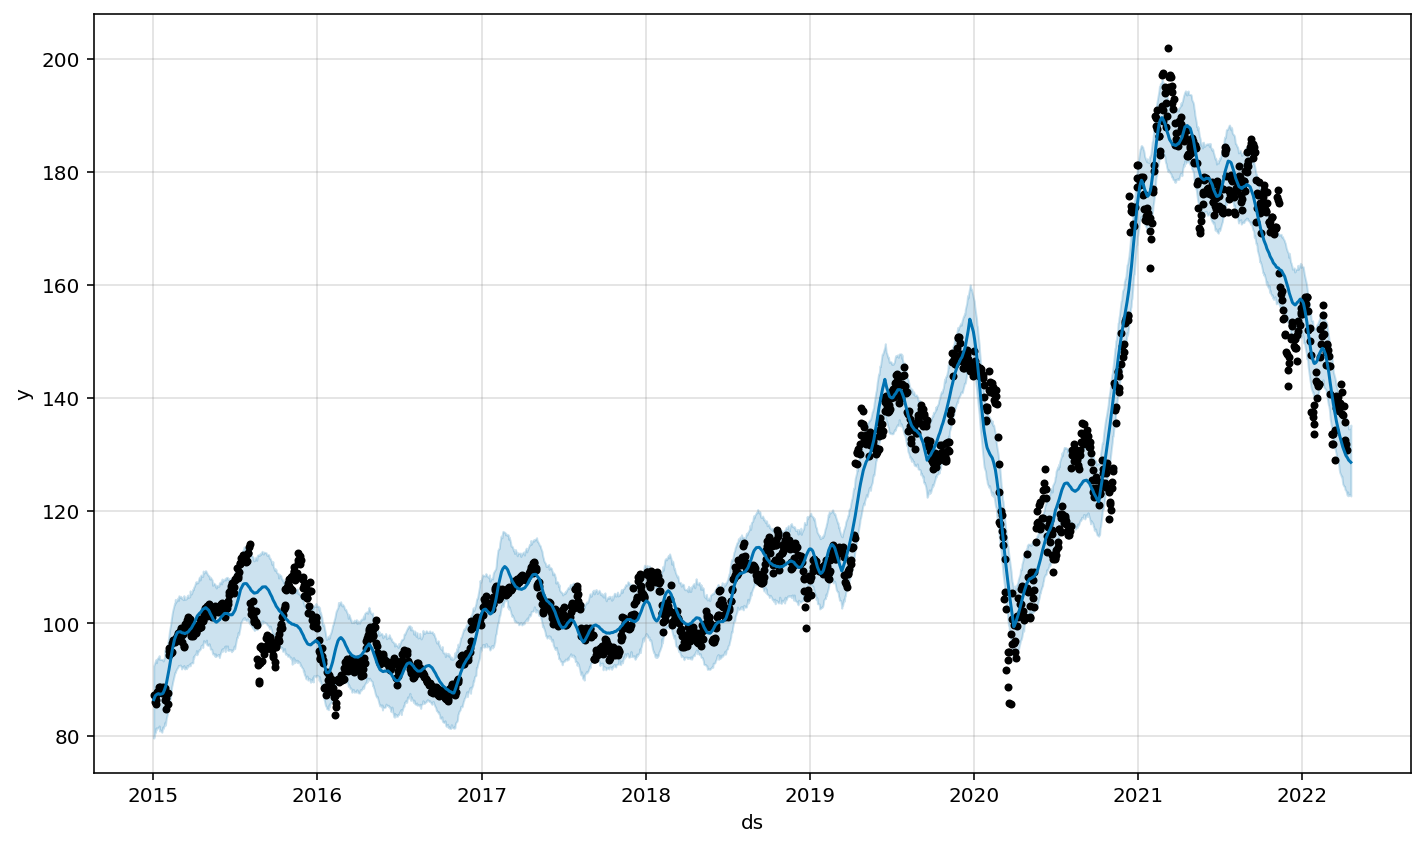

In [232]:
fig1 = prophet.plot(forecast_data3)

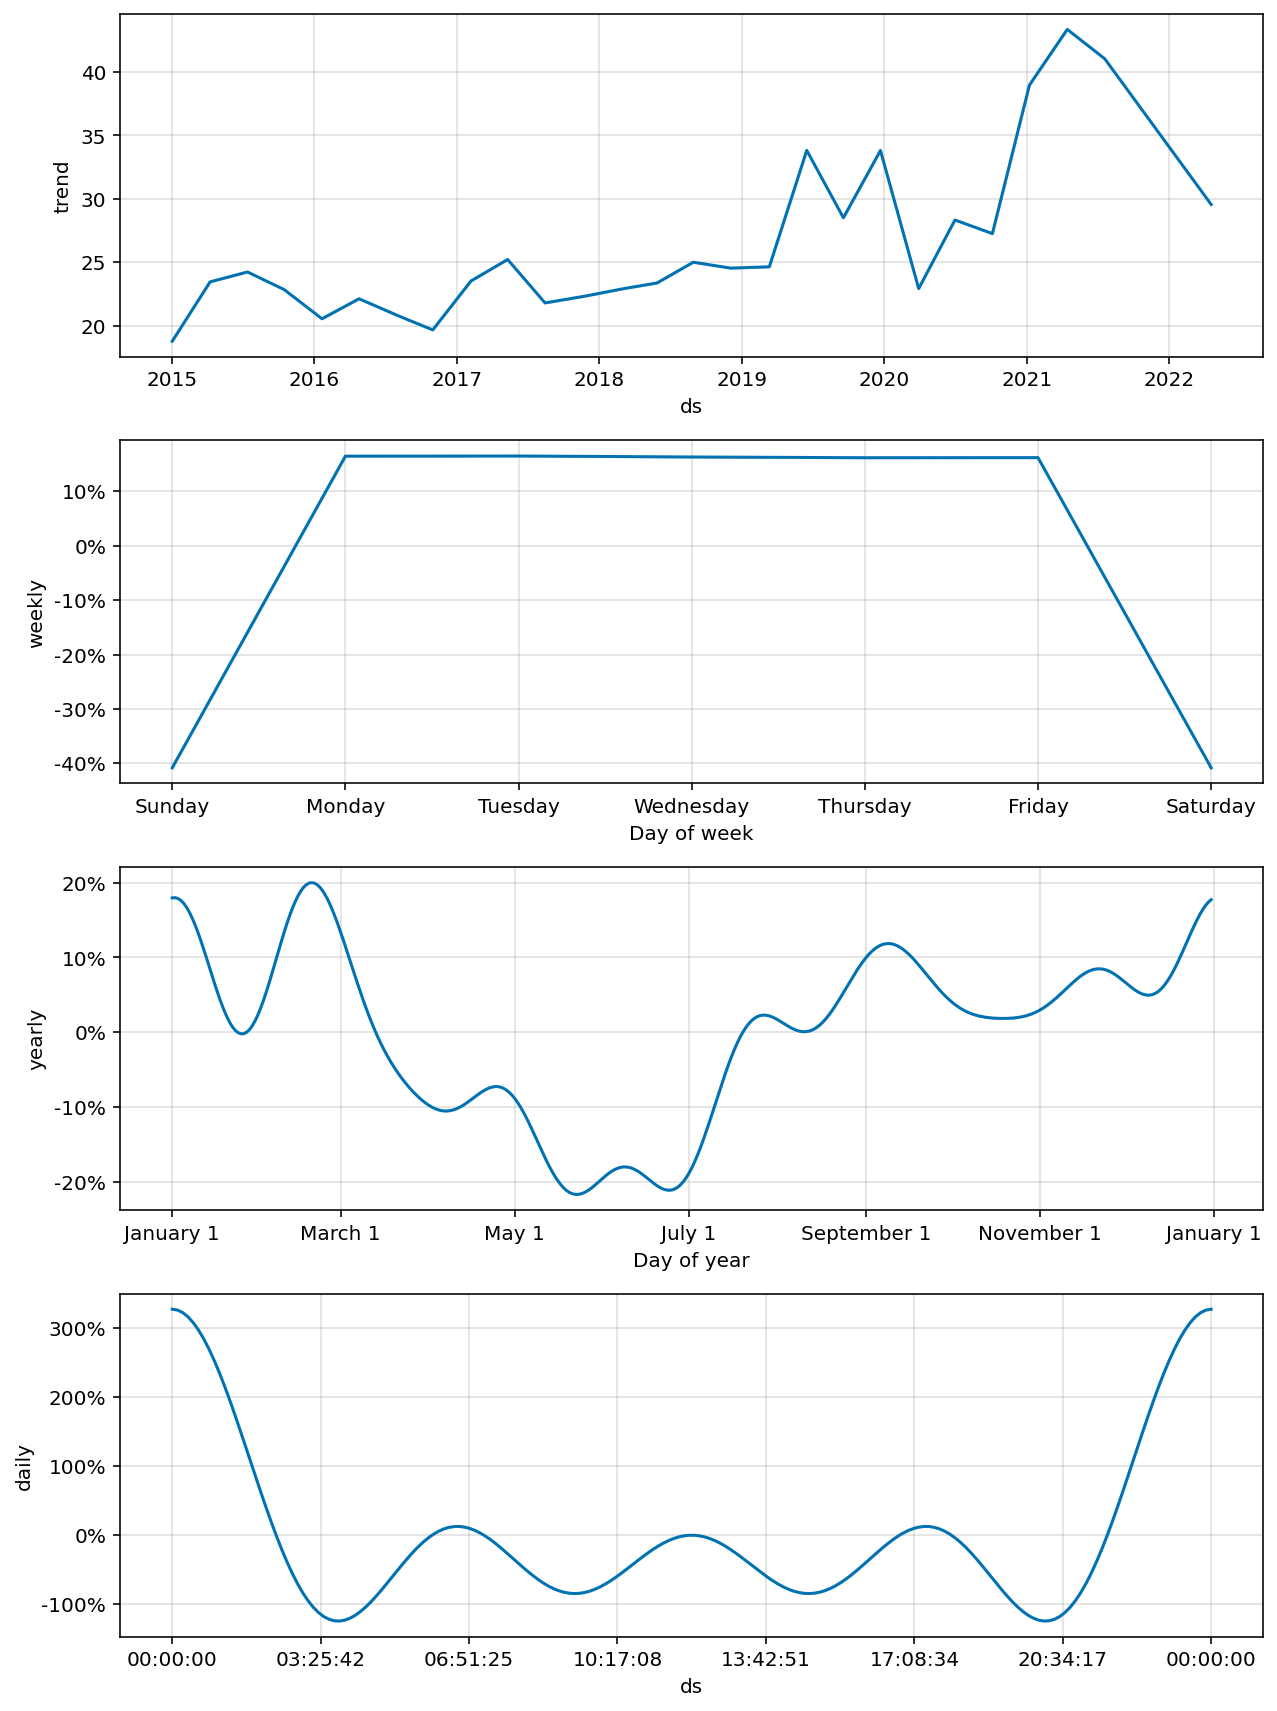

In [233]:
fig2 = prophet.plot_components(forecast_data3)

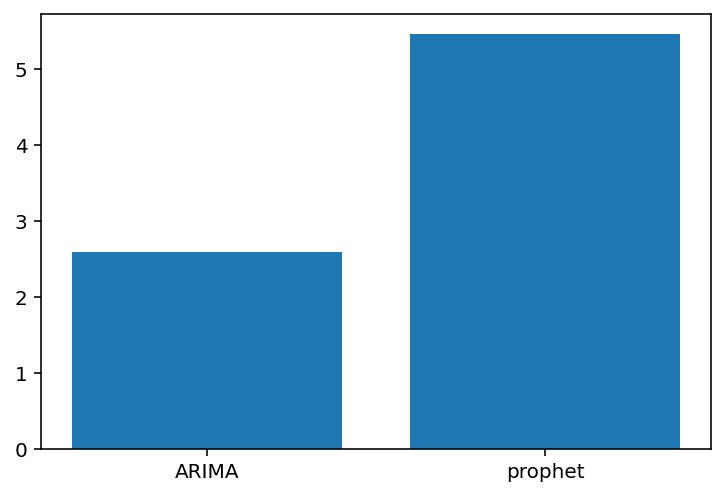

In [234]:
x = np.arange(2)
plt.bar(x, height= [a_mse,
                    pb_mse
                    ])
plt.xticks(x, ['ARIMA',
               'prophet'
               ]);